# Utilisation de Jupyter Notebook avec R sur Google Cloud
# Exemple avec CSV

## On installe les librairies nécessaires (si besoin)

In [1]:
# Librairies requises
list.of.packages <- c(
    "csv",
    "ggplot2",
    "ggforce",
    "isoband",
    "polyclip",
    "readr",
    "tweenr"
)

# Liste de librairies non présentes
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]

# On installe les librairies absentes le cas échéant
if(length(new.packages)) install.packages(new.packages)

## On charge les librairies

In [2]:
# Librairies
lapply(list.of.packages, require, character.only = TRUE)

Loading required package: csv

Loading required package: ggplot2

Loading required package: ggforce

Loading required package: isoband

Loading required package: polyclip

polyclip 1.10-0 built from Clipper C++ version 6.4.0

Loading required package: readr

Loading required package: tweenr



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

## On ouvre un fichier CSV

In [3]:
# CSV contenant des données astronomiques
bodies <- read_csv("./bodies.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  system = col_character(),
  body = col_character(),
  type = col_character(),
  subType = col_character(),
  temp = col_double(),
  radius = col_double(),
  absMagnitude = col_double(),
  solMass = col_double(),
  spectralClass = col_character(),
  luminosity = col_character()
)


Warning message:
“2 parsing failures.
  row          col expected actual           file
11344 absMagnitude a double   None './bodies.csv'
25539 absMagnitude a double   None './bodies.csv'
”


## Création d'un sous-ensemble de données

In [4]:
# Uniquement les étoiles de type M
mc <- subset(bodies, bodies$subType=="M (Red dwarf) Star")

# Création de la visualisation et de ses options
mg <- ggplot(mc, aes(temp, radius, color=spectralClass)) + 
  geom_point() +
  
  # Filtre pour illustrer une sous-classe spectrale
  geom_mark_hull(aes(filter = spectralClass == "M0",  label = spectralClass)) +
  labs(x="Temperature", y="Rayon", colour="Classe spectrale", title="Distrib. temperature/rayon chez les étoiles de classe M") +
  
  # Affichage ligne pour régression
  geom_smooth(method="lm")

Warning message:
“The concaveman package is required for geom_mark_hull”


## On affiche le résultat

`geom_smooth()` using formula 'y ~ x'



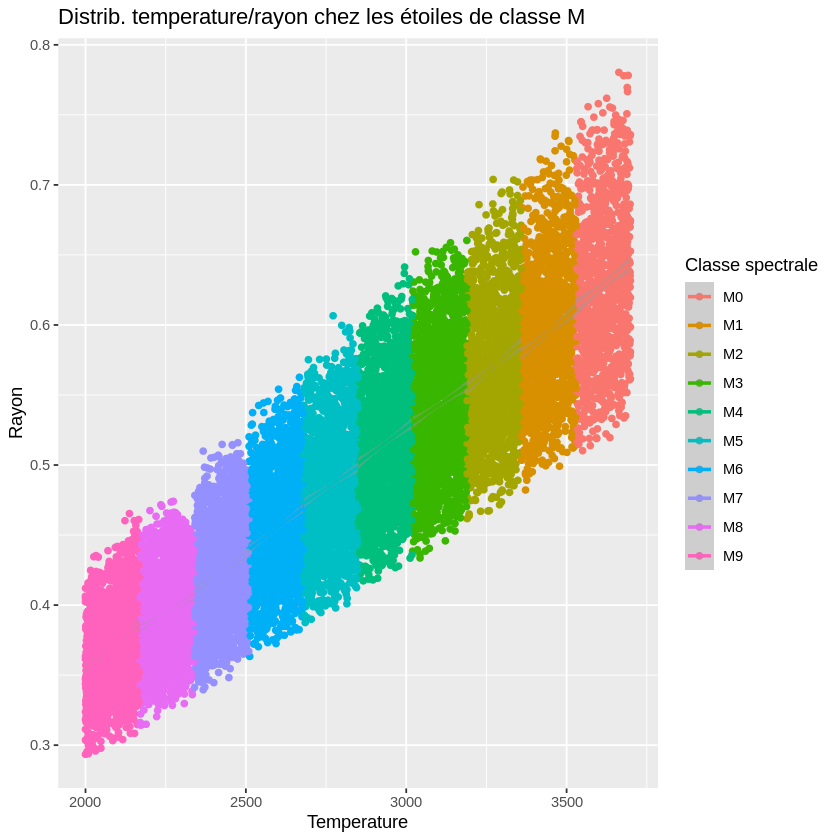

In [5]:
mg